<a href="https://colab.research.google.com/github/xanny1111/Spring_2025-Plotnov-24-VMz-/blob/master/quick_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [4]:
# The original update-alternatives commands failed, and the script explicitly uses python3.8 later,
# so these lines are removed to avoid confusing error messages.
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
# !update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1

!sudo apt update -y
!sudo apt install python3.8 -y
!sudo apt-get install python3.8-distutils -y
!sudo apt install python3.8-dev -y # Install development headers for Python 3.8

!python --version

!apt install software-properties-common -y

# Re-install pip, setuptools, wheel to ensure they are clean and up-to-date
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip -y

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH

# Upgrade pip, setuptools, and wheel for python3.8 specifically before installing requirements
!python3.8 -m pip install --upgrade pip setuptools wheel

!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update -y
!apt install ffmpeg -y &> /dev/null
!python3.8 -m pip install -r requirements.txt

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
49 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

Download models (1 mins)

In [5]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2025-11-17 18:37:48--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-17T19%3A23%3A35Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-17T18%3A22%3A59Z&ske=2025-11-17T19%3A23%3A35Z&sks=b&skv=2018-11-09&sig=vYOevJIHKrUQ6T8r%2FG0CfcFjs%2BCeJo3xW2y7aNzXDpk%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MzQwODI2OCwibmJ

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

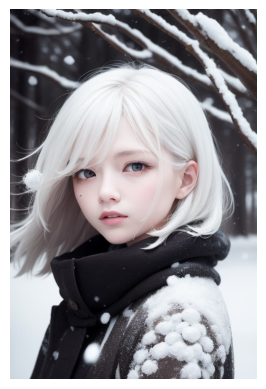

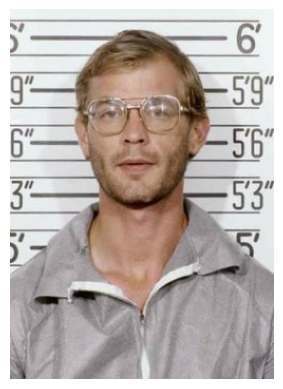

In [13]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [15]:
print(default_head_name.value)

head1111


In [16]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio "./examples/driven_audio/1 part.WAV" \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/head1111.png
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 11.97it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 23.62it/s]
mel:: 100% 1992/1992 [00:00<00:00, 46101.93it/s]
audio2exp:: 100% 200/200 [00:00<00:00, 401.51it/s]
Face Renderer:: 100% 996/996 [09:47<00:00,  1.69it/s]
The generated video is named ./results/2025_11_17_19.00.40/head1111##1 part.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 1992/1992 [00:40<00:00, 49.20it/s]
The generated video is named ./results/2025_11_17_19.00.40/head1111##1 part_full.mp4
face enhancer....
Face Enhancer::   0% 0/1992 [00:00<?, ?it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 700) to (512, 704) to ensure video compatibility with most codecs and players. To preve

In [17]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2025_11_17_19.00.40.mp4
